## 本节重点：

- 基于numpy实现线性回归算法

- 参考视频：
https://www.bilibili.com/video/BV1oD4y1u7U8/?spm_id_from=333.999.0.0&vd_source=ea41ada76e180cf6c5af0f913147e4c0

## 一、线性回归原理：
- 表达式:

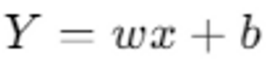

- 损失函数：

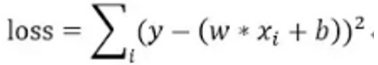

- 梯度更新：
lr为学习率，w和b的梯度就是对loss function的求导

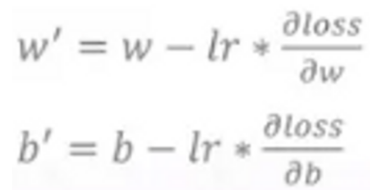

展开：

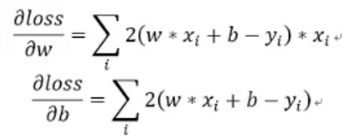


## 二、numpy实现
- 数据准备

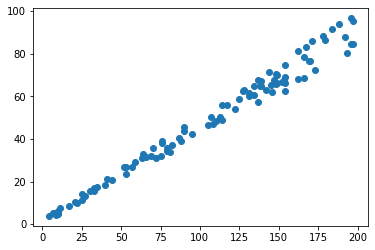

In [41]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(2,200, size = 100)
y =  np.linspace(0.4, 0.500, num=100)* x + np.random.randint(1,3,size=100)
plt.plot(x,y,'o')
plt.show()



- 推理（predict)

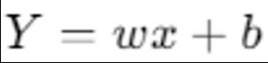

In [ ]:
def count_y_prediction(X, w, b):
    y_pred = np.add(np.multiply(w,X) , b)
    # y_pred = np.add(np.dot(w,x) ,b)
    # print(y_pred)
    return y_pred

- 损失函数

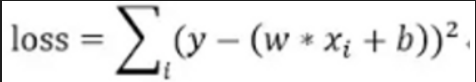

In [ ]:
def compete_error_for_given_points(y, y_pred):
    error = np.power(np.subtract(y, y_pred) , 2)
    error = np.sum(error) / y.shape[0]
    # print(error)
    return error

- 梯度更新

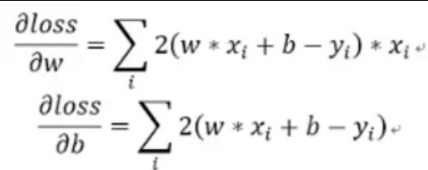

In [ ]:
def compete_gradient_and_update(x, w, b, lr):
    w_gradient = 0
    b_gradient = 0
    N = x.shape[0]
    w_gradient = 2*np.multiply(np.subtract(np.add(np.multiply(self.w,x),b),y),x)
    w_gradient_sum = np.sum(w_gradient)
    b_gradient = 2*np.subtract(np.add(np.multiply(self.w,x),b),y)
    b_gradient_sum = np.sum(b_gradient)
    w -= lr * w_gradient_sum / N
    b -= lr * b_gradient_sum / N
    return w,b

- 画图

In [ ]:
def draw(X, y, y_pred,final=True):
    # plt.ion()
    plt.clf()
    plt.scatter(X, y, c="red")
    plt.plot(X, y_pred, c="blue")
    if final:
        plt.pause(0.2) 
        # plt.close()
    else:
        plt.show()

### 代码封装

In [81]:
#简单线性回归
class SimpleRegress(object):
    def __init__(self):
        self.b = np.linspace(1, 3, num=100)
        self.w = np.ones((100,))
        self.lr = 0.003
        return
	
    #梯度更新
    def compete_gradient_and_update(self,x,y):
        w_gradient = 0
        b_gradient = 0
        N = x.shape[0]
        w_gradient = 2*np.multiply(np.subtract(np.add(np.multiply(self.w,x),self.b),y),x)
        w_gradient_sum = np.sum(w_gradient)
        b_gradient = 2*np.subtract(np.add(np.multiply(self.w,x),self.b),y)
        b_gradient_sum = np.sum(b_gradient)
        self.w -= self.lr * w_gradient_sum / N
        self.b -= self.lr * b_gradient_sum / N
        return self.w,self.b
    
    #求损失函数
    def compete_error_for_given_points(self,y, y_pred):
        error = np.power(np.subtract(y , y_pred) , 2)
        error = np.sum(error)/ error.shape[0]
        # print(error)
        return error
    
    #计算多少个epoch
    def gradient_desent_runner(self,times,x,y):
        for i in range(times):
            self.w,self.b = self.compete_gradient_and_update(x,y)
        return [self.w,self.b]
    
    #推理
    def count_y_prediction(self,X):
        y_pred = np.add(np.multiply(self.w,X) ,self.b)
        # print(y_pred)
        return y_pred		
    
    #画图
    def draw(self,X, y, y_pred,final=True):
        # plt.ion()
        plt.clf()
        plt.plot(X, y, 'o')
        plt.plot(X, y_pred, c="blue")
        if final:
            plt.pause(0.2) 
            # plt.close()
        else:
            plt.show()

  

In [82]:
#数据
x_data = np.random.randint(2,200, size = 100)
y_data = np.linspace(0.4, 0.450, num=100)* x_data 

times = 50 # epoch次数
test_data = list([16]) #测试数据
sr = SimpleRegress()
# 预测
y_pred = sr.count_y_prediction(x_data) 

# 记录原始值
print("Starting Giadient desent at w ={0},b ={1},error={2}"
        .format(sr.w,sr.b,sr.compete_error_for_given_points(y_data,y_pred)))
print("Running:")

# 梯度更新求解
[w,b] = sr.gradient_desent_runner(times,x_data,y_data)

# 最新预测值
y_pred = sr.count_y_prediction(x_data)
print("After {0} times w = {1},b = {2},error = {3}"
        .format(times,w,b,sr.compete_error_for_given_points(y_data,y_pred)))


Starting Giadient desent at w =[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.],b =[1.         1.02020202 1.04040404 1.06060606 1.08080808 1.1010101
 1.12121212 1.14141414 1.16161616 1.18181818 1.2020202  1.22222222
 1.24242424 1.26262626 1.28282828 1.3030303  1.32323232 1.34343434
 1.36363636 1.38383838 1.4040404  1.42424242 1.44444444 1.46464646
 1.48484848 1.50505051 1.52525253 1.54545455 1.56565657 1.58585859
 1.60606061 1.62626263 1.64646465 1.66666667 1.68686869 1.70707071
 1.72727273 1.74747475 1.76767677 1.78787879 1.80808081 1.82828283
 1.84848485 1.86868687 1.88888889 1.90909091 1.92929293 1.94949495
 1.96969697 1.98989899 2.01010101 2.03030303 2.05050505 2.07070707
 2.09090909 2.11111111 2.13131313 2.15151515 2.17171717 2.